In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from itertools import chain
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# Read data
MNCAATourney = pd.read_csv("/content/drive/MyDrive/DL_data/MNCAATourneyDetailedResults.csv")
MNCAATourney


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,2021,148,1211,85,1425,66,N,0,33,66,...,15,14,19,7,20,9,9,7,0,13
1177,2021,148,1417,51,1276,49,N,0,21,54,...,11,6,11,8,24,12,14,5,3,11
1178,2021,152,1124,78,1222,59,N,0,29,55,...,19,11,16,13,12,10,10,4,5,10
1179,2021,152,1211,93,1417,90,N,1,37,63,...,17,14,21,7,24,21,9,4,1,16


In [ ]:
# Show the number of rows and columnss
MNCAATourney.shape

(1181, 34)

In [ ]:
# See the head rows of a data frame
MNCAATourney.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [ ]:
MNCAATourney2 = MNCAATourney
features = ['Season', 'DayNum', 'WTeamID','WScore','LTeamID','LScore','WLoc','NumOT','WFGM','WFGA','WFGM3','WFGA3', 'WFTM','WFTA','WOR','WDR','WAst','WTO','WStl','WBlk','WPF','LFGM', 'LFGA','LFGM3','LFGA3','LFTM','LFTA','LOR','LDR','LAst','LTO','LStl','LBlk','LPF']
MNCAATourney['target'] = 1.0
MNCAATourney2['target'] = 0.0
train = pd.merge(MNCAATourney,MNCAATourney2,on = features,how="outer")
train = train[features]
train.head()


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [ ]:
# Change categorical variables to "category"
MNCAATourney[['WLoc', 'WTeamID', 'LTeamID']] = MNCAATourney[['WLoc','WTeamID', 'LTeamID']].astype('category')

In [ ]:
# Examine variable types
MNCAATourney.dtypes

Season        int64
DayNum        int64
WTeamID    category
WScore        int64
LTeamID    category
LScore        int64
WLoc       category
NumOT         int64
WFGM          int64
WFGA          int64
WFGM3         int64
WFGA3         int64
WFTM          int64
WFTA          int64
WOR           int64
WDR           int64
WAst          int64
WTO           int64
WStl          int64
WBlk          int64
WPF           int64
LFGM          int64
LFGA          int64
LFGM3         int64
LFGA3         int64
LFTM          int64
LFTA          int64
LOR           int64
LDR           int64
LAst          int64
LTO           int64
LStl          int64
LBlk          int64
LPF           int64
target      float64
dtype: object

In [ ]:
# Display all numeric variables
MNCAATourney.select_dtypes(include=['number'])

,Season,DayNum,WScore,LScore,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,target
0,2003,134,92,84,1,32,69,11,29,17,...,14,31,17,28,16,15,5,0,22,0.0
1,2003,136,80,51,0,31,66,7,23,11,...,7,7,8,26,12,17,10,3,15,0.0
2,2003,136,84,71,0,31,59,6,14,16,...,14,21,20,22,11,12,2,5,18,0.0
3,2003,136,79,73,0,29,53,3,7,18,...,12,17,14,17,20,21,6,6,21,0.0
4,2003,136,76,74,1,27,64,7,20,15,...,15,20,10,26,16,14,5,8,19,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,2021,148,85,66,0,33,66,7,21,12,...,14,19,7,20,9,9,7,0,13,0.0
1177,2021,148,51,49,0,21,54,3,13,6,...,6,11,8,24,12,14,5,3,11,0.0
1178,2021,152,78,59,0,29,55,11,24,9,...,11,16,13,12,10,10,4,5,10,0.0
1179,2021,152,93,90,1,37,63,7,21,12,...,14,21,7,24,21,9,4,1,16,0.0


In [ ]:
# Display all categorical variables
MNCAATourney.select_dtypes(include=['category'])

,WTeamID,LTeamID,WLoc
0,1421,1411,N
1,1112,1436,N
2,1113,1272,N
3,1141,1166,N
4,1143,1301,N
...,...,...,...
1176,1211,1425,N
1177,1417,1276,N
1178,1124,1222,N
1179,1211,1417,N


In [ ]:
MNCAATourney2 = MNCAATourney
MNCAATourney['target'] = 1.0
MNCAATourney2['target'] = 0.0

In [ ]:
# Examine variable type
MNCAATourney.dtypes

Season        int64
DayNum        int64
WTeamID       int64
WScore        int64
LTeamID       int64
LScore        int64
WLoc       category
NumOT         int64
WFGM          int64
WFGA          int64
WFGM3         int64
WFGA3         int64
WFTM          int64
WFTA          int64
WOR           int64
WDR           int64
WAst          int64
WTO           int64
WStl          int64
WBlk          int64
WPF           int64
LFGM          int64
LFGA          int64
LFGM3         int64
LFGA3         int64
LFTM          int64
LFTA          int64
LOR           int64
LDR           int64
LAst          int64
LTO           int64
LStl          int64
LBlk          int64
LPF           int64
dtype: object

In [ ]:
MTeams = pd.read_csv("/content/drive/MyDrive/DL_data/MTeams.csv")
MTeams

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2022
1,1102,Air Force,1985,2022
2,1103,Akron,1985,2022
3,1104,Alabama,1985,2022
4,1105,Alabama A&M,2000,2022
...,...,...,...,...
367,1468,Bellarmine,2021,2022
368,1469,Dixie St,2021,2022
369,1470,Tarleton St,2021,2022
370,1471,UC San Diego,2021,2022


In [ ]:
df_TDresults2 = df_TDresults
df_TDresults = df_TDresults.rename(columns={"WTeamID":"Team1ID", "LTeamID":"Team2ID", "WScore":"T1Score", "LScore":"T2Score"})
df_TDresults = df_TDresults.rename(columns={f"W(col"}:f"T1{col}" for col in box_col})
df_TDresults = df_TDresults.rename(columns={f"W(col"}:f"T2{col}" for col in box_col})
df_TDresults = df_TDresults2.rename(columns={"WTeamID":"Team2ID", "LTeamID":"Team1ID", "WScore":"T2Score","LScore":"T1Score"})

**2. Data Exploration**

Text(0.5, 1.0, 'Histogram of WFGM in the MNCAATourney data set')

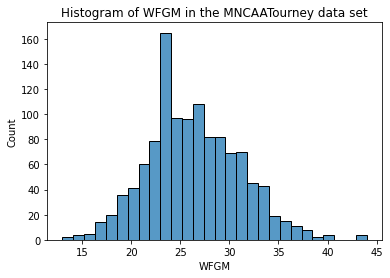

In [ ]:
# Histogram of the number of field goals made by winning team
snsplot = sns.histplot(x='WFGM' , data = MNCAATourney)
snsplot.set_title("Histogram of WFGM in the MNCAATourney data set")

Text(0.5, 1.0, 'Histogram of LFGM in the MNCAATourney data set')

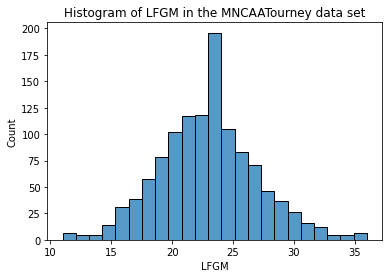

In [ ]:
# Histogram of the number of field goals made by losing team
snsplot = sns.histplot(x='LFGM' , data = MNCAATourney)
snsplot.set_title("Histogram of LFGM in the MNCAATourney data set")

Text(0.5, 1.0, 'Histogram of WFGA in the MNCAATourney data set')

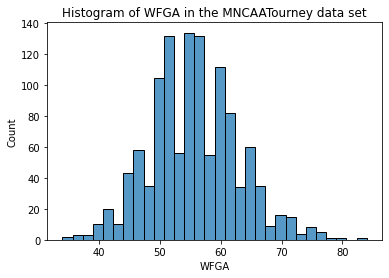

In [ ]:
# Histogram of the number of field goals attempted by winning team
snsplot = sns.histplot(x='WFGA', data = MNCAATourney)
snsplot.set_title("Histogram of WFGA in the MNCAATourney data set")


Text(0.5, 1.0, 'Histogram of LFGA in the MNCAATourney data set')

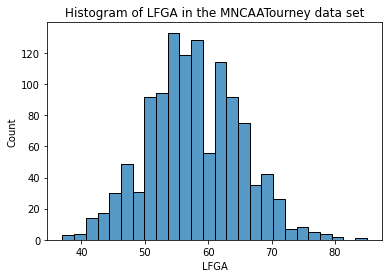

In [ ]:
# Histogram of the number of field goals attempted by losing team
snsplot = sns.histplot(x='LFGA', data = MNCAATourney)
snsplot.set_title("Histogram of LFGA in the MNCAATourney data set")

Text(0.5, 1.0, 'Histogram of Wscore in the MNCAATourney data set')

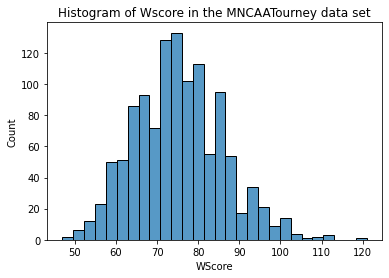

In [ ]:
# Histogram of the final scores of the winning teams
snsplot = sns.histplot(x='WScore', data = MNCAATourney)
snsplot.set_title("Histogram of Wscore in the MNCAATourney data set")

Text(0.5, 1.0, 'Histogram of Lscore in the MNCAATourney data set')

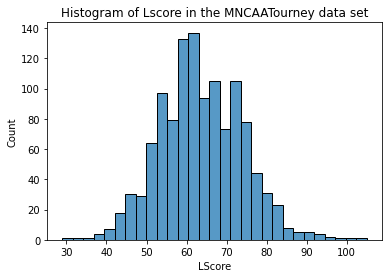

In [ ]:
# Histogram of the final scores of the losing teams
snsplot = sns.histplot(x='LScore', data = MNCAATourney)
snsplot.set_title("Histogram of Lscore in the MNCAATourney data set")

Text(0.5, 1.0, 'Boxplot of WScore in the MNCAATourney data set')

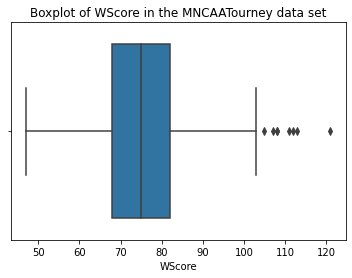

In [ ]:
# Boxplot of the final scores of the winning teams
snsplot = sns.boxplot(x='WScore', data = MNCAATourney)
snsplot.set_title("Boxplot of WScore in the MNCAATourney data set")

Text(0.5, 1.0, 'Boxplot of LScore in the MNCAATourney data set')

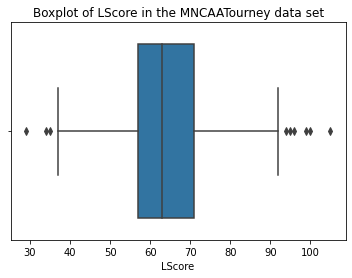

In [ ]:
# Boxplot of the final scores of the losing teams
snsplot = sns.boxplot(x='LScore', data = MNCAATourney)
snsplot.set_title("Boxplot of LScore in the MNCAATourney data set")

Text(0.5, 1.0, 'Boxplot of WTO in the MNCAATourney data set')

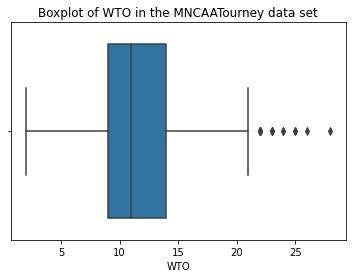

In [ ]:
# Boxplot of the amount of turnovers committed by the winning team
snsplot = sns.boxplot(x='WTO', data = MNCAATourney)
snsplot.set_title("Boxplot of WTO in the MNCAATourney data set")

Text(0.5, 1.0, 'Boxplot of WTO in the MNCAATourney data set')

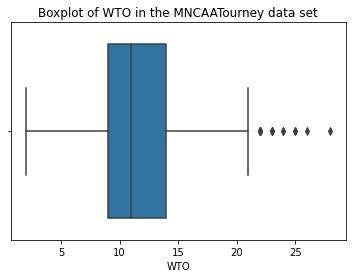

In [ ]:
# Boxplot of the amount of turnovers committed by the winning team
snsplot = sns.boxplot(x='WTO', data = MNCAATourney)
snsplot.set_title("Boxplot of WTO in the MNCAATourney data set")

Text(0.5, 1.0, 'Boxplot of LTO in the MNCAATourney data set')

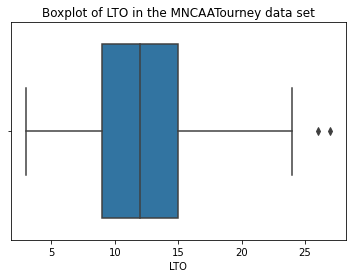

In [ ]:
# Boxplot of the amount of turnovers committed by the losing team
snsplot = sns.boxplot(x='LTO', data = MNCAATourney)
snsplot.set_title("Boxplot of LTO in the MNCAATourney data set")

In [ ]:
MNCAATourney.corr()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
Season,1.000000,0.007896,-0.020088,0.020658,-0.007653,-0.002074,-0.034767,0.057977,0.079209,0.107300,...,0.138468,-0.043738,-0.074608,-0.214610,0.106371,-0.077966,-0.166268,-0.152334,0.058212,-0.135146
DayNum,0.007896,1.000000,-0.074454,-0.004614,0.017832,0.083107,0.046160,0.006552,0.067700,-0.004788,...,-0.057324,0.071365,0.074008,0.106001,0.012216,-0.002521,-0.071253,0.023508,0.092611,-0.027290
WTeamID,-0.020088,-0.074454,1.000000,-0.025476,-0.046826,-0.016623,0.014690,-0.048397,-0.007732,0.043837,...,-0.005210,0.018269,0.023231,0.013762,0.018118,-0.027999,0.012992,-0.006900,-0.022625,0.029740
WScore,0.020658,-0.004614,-0.025476,1.000000,-0.086534,0.666268,0.159169,0.827359,0.485649,0.383458,...,0.193728,0.289657,0.268559,0.058414,-0.175692,0.279708,0.036751,0.041485,-0.096459,0.218545
LTeamID,-0.007653,0.017832,-0.046826,-0.086534,1.000000,-0.025613,0.032580,-0.053405,-0.041377,-0.024099,...,0.023099,-0.020701,-0.013069,0.035859,-0.002377,-0.010397,-0.076379,0.018029,-0.006120,-0.032768
LScore,-0.002074,0.083107,-0.016623,0.666268,-0.025613,1.000000,0.323176,0.468301,0.355603,0.231553,...,0.212098,0.422601,0.379726,0.117470,0.048476,0.485091,-0.065598,0.041940,0.005997,0.320714
NumOT,-0.034767,0.046160,0.014690,0.159169,0.032580,0.323176,1.000000,0.117713,0.261727,0.076850,...,0.094361,0.154491,0.158784,0.102206,0.239573,0.179345,0.054123,0.045911,0.100093,0.118024
WFGM,0.057977,0.006552,-0.048397,0.827359,-0.053405,0.468301,0.117713,1.000000,0.624871,0.277307,...,0.150484,0.119447,0.098466,0.014008,-0.190238,0.237847,0.005204,0.015490,-0.093075,-0.204811
WFGA,0.079209,0.067700,-0.007732,0.485649,-0.041377,0.355603,0.261727,0.624871,1.000000,0.151331,...,0.096195,0.161892,0.162382,0.006905,0.386524,0.167640,0.174558,-0.084572,0.241980,-0.156891
WFGM3,0.107300,-0.004788,0.043837,0.383458,-0.024099,0.231553,0.076850,0.277307,0.151331,1.000000,...,0.046125,0.078111,0.071349,-0.022045,-0.041798,0.098724,-0.034225,-0.012318,-0.054108,-0.184339


**3. Partition the data set for Decision Tree model**

In [ ]:
MNCAATourney = MNCAATourney2
MNCAATourney['target'] = 1.0
MNCAATourney2['target'] = 0

In [ ]:
MNCAATourney.sample(frac = 0.5, random_state = 1, replace = False)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,target
919,2017,136,1139,76,1457,64,N,0,24,49,...,5,10,3,24,12,9,6,1,22,0
298,2007,139,1242,88,1246,76,N,0,30,53,...,18,23,15,17,17,12,5,2,22,0
926,2017,136,1323,60,1343,58,N,0,21,52,...,6,6,7,26,13,9,2,4,14,0
323,2008,136,1243,80,1425,67,N,0,29,60,...,19,27,9,18,12,11,6,4,24,0
239,2006,139,1437,82,1112,78,N,0,28,52,...,17,20,20,14,15,10,7,2,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2005,136,1211,74,1457,64,N,0,27,59,...,10,12,10,26,16,13,4,0,19,0
809,2015,137,1328,69,1107,60,N,0,25,57,...,6,10,14,20,15,7,6,1,16,0
1112,2019,152,1403,61,1277,51,N,0,22,51,...,14,18,8,28,6,11,1,2,15,0
804,2015,137,1242,75,1308,56,N,0,27,50,...,11,16,14,15,8,11,10,3,15,0


In [ ]:
MNCAATourney2.sample(frac = 0.5, random_state = 0, replace = False)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,target
1100,2019,143,1211,72,1199,58,N,0,25,62,...,7,11,7,29,10,14,9,6,20,0
351,2008,137,1437,75,1155,69,N,0,22,44,...,14,23,12,19,9,14,8,3,24,0
704,2013,144,1257,77,1332,69,N,0,28,52,...,10,17,12,23,12,12,7,3,22,0
434,2009,143,1281,102,1272,91,N,0,33,62,...,18,32,15,25,16,14,8,6,25,0
513,2011,134,1421,81,1114,77,N,1,27,54,...,20,26,7,26,19,16,6,2,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,2017,143,1332,69,1276,68,N,0,26,58,...,7,7,2,29,16,8,3,2,16,0
867,2016,137,1218,77,1143,66,N,0,27,52,...,17,26,12,26,6,16,3,1,24,0
78,2004,136,1400,66,1343,49,N,0,23,50,...,8,12,9,14,11,7,5,0,18,0
833,2015,143,1246,78,1452,39,N,0,24,50,...,11,19,13,19,7,13,4,3,29,0


In [ ]:
# Create dummy variables
MNCAATourney2 = pd.get_dummies(MNCAATourney2, columns=['WLoc', 'WTeamID', 'LTeamID'],drop_first=True)
MNCAATourney2

,Season,DayNum,WScore,LScore,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,...,LTeamID_1453,LTeamID_1454,LTeamID_1455,LTeamID_1457,LTeamID_1458,LTeamID_1459,LTeamID_1460,LTeamID_1461,LTeamID_1462,LTeamID_1463
0,2003,134,92,84,1,32,69,11,29,17,...,0,0,0,0,0,0,0,0,0,0
1,2003,136,80,51,0,31,66,7,23,11,...,0,0,0,0,0,0,0,0,0,0
2,2003,136,84,71,0,31,59,6,14,16,...,0,0,0,0,0,0,0,0,0,0
3,2003,136,79,73,0,29,53,3,7,18,...,0,0,0,0,0,0,0,0,0,0
4,2003,136,76,74,1,27,64,7,20,15,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,2021,148,85,66,0,33,66,7,21,12,...,0,0,0,0,0,0,0,0,0,0
1177,2021,148,51,49,0,21,54,3,13,6,...,0,0,0,0,0,0,0,0,0,0
1178,2021,152,78,59,0,29,55,11,24,9,...,0,0,0,0,0,0,0,0,0,0
1179,2021,152,93,90,1,37,63,7,21,12,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Apply standardization
numeric_variables = MNCAATourney[['Season', 'DayNum','WScore', 'LTeamID','LScore','NumOT','WFGM','WFGA','WFGM3','WFGA3', 'WFTM','WFTA','WOR','WDR','WAst','WTO','WStl','WBlk','WPF','LFGM', 'LFGA','LFGM3','LFGA3','LFTM','LFTA','LOR','LDR','LAst','LTO','LStl','LBlk','LPF']]
scaler_s = StandardScaler().fit(numeric_variables)
standard_variables = scaler_s.transform(numeric_variables)
print(standard_variables)
MNCAATourney[['Season','DayNum','WScore','LTeamID','LScore','NumOT','WFGM','WFGA','WFGM3','WFGA3', 'WFTM','WFTA','WOR','WDR','WAst','WTO','WStl','WBlk','WPF','LFGM', 'LFGA','LFGM3','LFGA3','LFTM','LFTA','LOR','LDR','LAst','LTO','LStl','LBlk','LPF']] = standard_variables
MNCAATourney

[[-1.64080283 -1.20701646  1.5639104  ... -0.26520059 -1.43762977
   0.74381241]
 [-1.64080283 -0.73453173  0.44452968 ...  1.60801648  0.02939853
  -0.91095002]
 [-1.64080283 -0.73453173  0.81765659 ... -1.38913082  1.0074174
  -0.20176612]
 ...
 [ 1.77346759  3.04534614  0.25796623 ... -0.639844    1.0074174
  -2.09292319]
 [ 1.77346759  3.04534614  1.65719213 ... -0.639844   -0.94862033
  -0.67455539]
 [ 1.77346759  3.51783087  1.00422004 ... -0.639844    0.02939853
  -0.43816075]]


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,-1.640803,-1.207016,1421,1.563910,1.099259,1.969937,3.160294,1.190820,1.874387,1.341624,...,1.802490,0.463763,2.176946,1.430994,1.486263,1.261204,0.721798,-0.265201,-1.437630,0.743812
1,-1.640803,-0.734532,1112,0.444530,1.335329,-1.233533,-0.241992,0.980255,1.459016,-0.007712,...,-0.773223,-0.905497,-1.455655,-0.704947,1.038031,0.162158,1.232090,1.608016,0.029399,-0.910950
2,-1.640803,-0.734532,1113,0.817657,-0.213291,0.707964,-0.241992,0.980255,0.489817,-0.345046,...,1.287347,0.463763,0.663362,2.142975,0.141567,-0.112603,-0.043641,-1.389131,1.007417,-0.201766
3,-1.640803,-0.734532,1141,0.351248,-1.214228,0.902114,-0.241992,0.559127,-0.340925,-1.357048,...,-0.601508,0.072546,0.057929,0.719014,-0.979013,2.360251,2.252674,0.109443,1.496427,0.507418
4,-1.640803,-0.734532,1143,0.071403,0.060551,0.999189,3.160294,0.137999,1.182102,-0.007712,...,0.085348,0.659371,0.512004,-0.230293,1.038031,1.261204,0.466652,-0.265201,2.474446,0.034629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,1.773468,2.100377,1211,0.910938,1.231458,0.222590,-0.241992,1.401384,1.459016,-0.007712,...,-0.944937,0.463763,0.360646,-0.942274,-0.306665,-0.662126,-0.809079,0.484086,-1.437630,-1.383739
1177,1.773468,2.100377,1417,-2.260640,-0.175519,-1.427683,-0.241992,-1.125386,-0.202468,-1.357048,...,-1.631793,-1.101106,-0.850221,-0.704947,0.589799,0.162158,0.466652,-0.265201,0.029399,-1.856529
1178,1.773468,3.045346,1124,0.257966,-0.685431,-0.456934,-0.241992,0.559127,-0.064011,1.341624,...,-0.258080,-0.123063,-0.093429,0.481687,-2.099594,-0.387365,-0.553933,-0.639844,1.007417,-2.092923
1179,1.773468,3.045346,1211,1.657192,1.155916,2.552386,3.160294,2.243640,1.043645,-0.007712,...,-0.601508,0.463763,0.663362,-0.942274,0.589799,2.635012,-0.809079,-0.639844,-0.948620,-0.674555


In [ ]:
# Create dummy variables
MNCAATourney = pd.get_dummies(MNCAATourney, columns=['WLoc'],drop_first=True)
MNCAATourney

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,1,32,69,11,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,0,31,66,7,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,0,31,59,6,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,0,29,53,3,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,1,27,64,7,...,21,15,20,10,26,16,14,5,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,2021,148,1211,85,1425,66,0,33,66,7,...,15,14,19,7,20,9,9,7,0,13
1177,2021,148,1417,51,1276,49,0,21,54,3,...,11,6,11,8,24,12,14,5,3,11
1178,2021,152,1124,78,1222,59,0,29,55,11,...,19,11,16,13,12,10,10,4,5,10
1179,2021,152,1211,93,1417,90,1,37,63,7,...,17,14,21,7,24,21,9,4,1,16


In [ ]:
# Partition the data to predictors_train, predictors_test, target_train, and target_test. Set test_size=0.3 and random_state=0. 
target = MNCAATourney['WTeamID']
predictors = MNCAATourney.drop(['WTeamID'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(826, 32) (355, 32) (826,) (355,)


Text(0.5, 1.0, 'Histogram of WTeamID in the training data set')

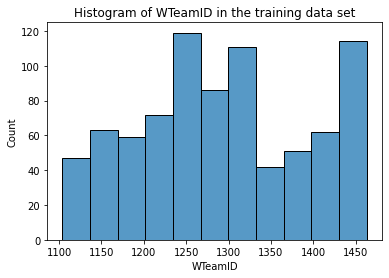

In [ ]:
# Examine the distribution of target variable for training data set
snsplot = sns.histplot(data = target_train)
snsplot.set_title("Histogram of WTeamID in the training data set")

Text(0.5, 1.0, 'Histogram of WTeamID in the testing data set')

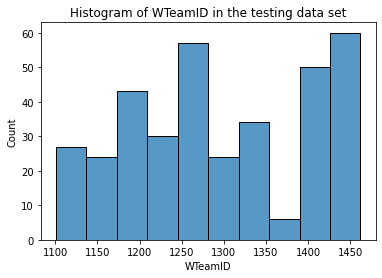

In [ ]:
# Examine the distribution of target variable for testing data set
snsplot = sns.histplot(data = target_test)
snsplot.set_title("Histogram of WTeamID in the testing data set")

In [ ]:
# Examine the proportion of target variable for training data set 
print(target_train.value_counts(normalize=True))

1242    0.043584
1314    0.037530
1246    0.036320
1458    0.029056
1181    0.029056
          ...   
1413    0.001211
1378    0.001211
1463    0.001211
1241    0.001211
1221    0.001211
Name: WTeamID, Length: 146, dtype: float64


In [ ]:
# Examine the proportion of target variable for testing data set 
print(target_test.value_counts(normalize=True))

1196    0.050704
1181    0.042254
1437    0.039437
1314    0.039437
1277    0.036620
          ...   
1214    0.002817
1295    0.002817
1443    0.002817
1120    0.002817
1278    0.002817
Name: WTeamID, Length: 104, dtype: float64


# 4. Predicting Neural Network

In [ ]:
# Build a four-layer neural network (one input layer, two hidden layers, one output layer) on training data; use ReLU() as the activation function. 
class neural_network(nn.Module):
    def __init__(self,  in_size, hidden_size, out_size):
        super().__init__()
        self.network = nn.Sequential(
          nn.Linear(in_size, hidden_size),
          nn.ReLU(),
          nn.Linear(hidden_size, hidden_size),
          nn.ReLU(),
          nn.Linear(hidden_size, out_size))

    def forward(self, x):
        out = self.network(x)
        return out

In [ ]:
# Encode label to numeric
label_encoder = preprocessing.LabelEncoder()
new_label = label_encoder.fit_transform(target_train)
new_label[:5], target_train[:5]

NameError: ignored

In [ ]:
# Create tensor from pandas dataframe
predictors_train_tensor = torch.tensor(predictors_train.values)
target_train_tensor = torch.tensor(target_train.values)
predictors_test_tensor = torch.tensor(predictors_test.values)
target_test_tensor = torch.tensor(target_test.values)

# Create tensor dataset (set target variable to float type)
train_dataset = torch.utils.data.TensorDataset(predictors_train_tensor.float(), target_train_tensor.long())
test_dataset = torch.utils.data.TensorDataset(predictors_test_tensor.float(), target_test_tensor.long())

# Define training and testing data loader, and set batch size to 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# Define training loop function
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(0, n_epochs):
        # Training Phase 
        model.train()
        loss_train = 0.0
        for inputs, labels in train_loader:

            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()

        if epoch == 0 or epoch == n_epochs-1 or epoch % 100 == 0:
            print('Epoch {}, Training loss {}'.format(epoch, loss_train / len(train_loader)))

In [ ]:
# Model training
torch.manual_seed(0)
model = neural_network(39, 64, 2)
optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs = 50, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_loader)

RuntimeError: ignored

In [ ]:
# Define testing function
def test(model, train_loader, test_loader):
 
  # testing phase
  model.eval()
  predict_train = []
  predict_test = []
  labels_train = []
  labels_test = []

  with torch.no_grad():
      for inputs, labels in train_loader:
          outputs = model(inputs)
          index_, predicted = torch.max(outputs, dim=1)
          predict_train.append(predicted.tolist())
          labels_train.append(labels.tolist())

      for inputs, labels in test_loader:
          outputs = model(inputs)
          index_, predicted = torch.max(outputs, dim=1)
          predict_test.append(predicted.tolist())
          labels_test.append(labels.tolist())

  print("Confusion matrix on train:\n",  confusion_matrix(list(chain(*labels_train)), list(chain(*predict_train)), labels=[0, 1]))
  print()
  print("Classification report on train:\n",  classification_report(list(chain(*labels_train)), list(chain(*predict_train)), labels=[0, 1]))
  print()
  print("Confusion matrix on test:\n",  confusion_matrix(list(chain(*labels_test)), list(chain(*predict_test)), labels=[0, 1]))
  print()
  print("Classification report on test:\n",  classification_report(list(chain(*labels_test)), list(chain(*predict_test)), labels=[0, 1]))

In [ ]:
# Examine evaluation results
test(model, train_loader, test_loader)

RuntimeError: ignored